## EDA

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(f'C:/Users/pipatra.NSN-INTRA/Desktop/Anaconda/Projects/21-Sept/Rapido(Like_uber)/data/Clean_Rapido_data.csv')

In [3]:
data.head()

,ts,number
0,2018-04-07 07:07:17,14626
1,2018-04-07 07:32:27,85490
2,2018-04-07 07:36:44,5408
3,2018-04-07 07:38:00,58940
4,2018-04-07 07:39:29,5408


### Top 50 users most booking

In [4]:
# number_data = data.groupby('number').apply(lambda x: x.sort_values(["number"], ascending = False)).reset_index(drop=True)
data.groupby('number').count()

,ts
number,
-1,373
0,63
1,59
2,46
3,5
4,170
5,204
6,169
7,106


#### Top

In [5]:
data.number.value_counts()[0:50]

83997    3652
10711    2902
64053    2849
8982     2628
43330    2555
89511    2538
79064    2510
13083    2422
19983    2382
81863    2306
4229     2295
61577    2288
79624    2276
62796    2262
38393    2243
89444    2223
1149     2222
37385    2180
61411    2173
42791    2152
31651    2139
79104    2119
38004    2111
79121    2093
92951    2086
58940    2070
52440    2035
48127    2004
79985    1977
83844    1929
47002    1912
56166    1903
79487    1903
48284    1897
80714    1894
3337     1894
5823     1882
14525    1876
33836    1869
83601    1869
80572    1856
47460    1843
94569    1840
71962    1839
70970    1835
12002    1830
50291    1809
39517    1799
21442    1784
69431    1780
Name: number, dtype: int64

#### Bottom

In [6]:
data.number.value_counts()[-50:]

47714    1
10876    1
54541    1
80465    1
96857    1
84574    1
35430    1
34052    1
12521    1
75053    1
51869    1
92841    1
84667    1
35459    1
38127    1
46315    1
60047    1
10903    1
93909    1
76471    1
47748    1
83158    1
14996    1
95442    1
46316    1
38120    1
3831     1
43651    1
60043    1
19096    1
74970    1
84652    1
79139    1
43667    1
48875    1
14976    1
2697     1
72363    1
1286     1
99637    1
98004    1
50406    1
61159    1
76462    1
5377     1
51860    1
13575    1
24306    1
75044    1
18349    1
Name: number, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

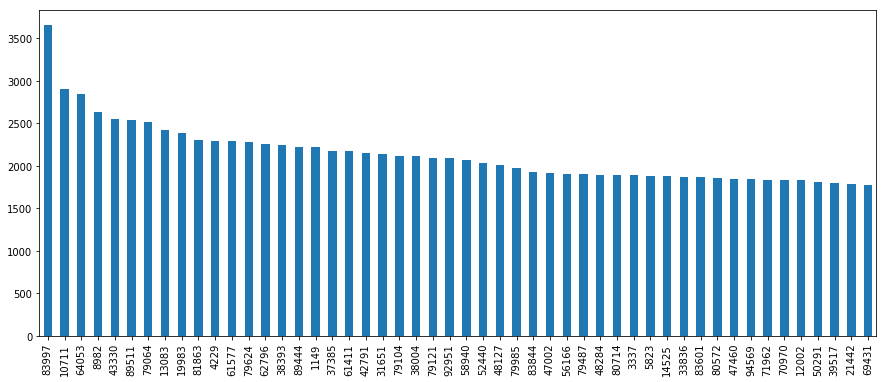

In [8]:
plt.figure(figsize=(15,6))
data.number.value_counts()[0:50].plot(kind='bar')

## Feature Engineering

- is_weekend
- is_weekday
- is_start_of_week
- is_wednesday
- is_end_of_week
- is_holiday

In [9]:
data.dtypes

ts        object
number     int64
dtype: object

In [10]:
data.ts = data.ts.astype('datetime64[ns]')

In [11]:
data.dtypes

ts        datetime64[ns]
number             int64
dtype: object

In [21]:
data.ts.dt.dayofweek

0          5
1          5
2          5
3          5
4          5
5          5
6          5
7          5
8          5
9          5
10         5
11         5
12         5
13         5
14         5
15         5
16         5
17         5
18         5
19         5
20         5
21         5
22         5
23         5
24         5
25         5
26         5
27         5
28         5
29         5
          ..
8381526    6
8381527    6
8381528    6
8381529    6
8381530    6
8381531    6
8381532    6
8381533    6
8381534    6
8381535    6
8381536    6
8381537    6
8381538    6
8381539    6
8381540    6
8381541    6
8381542    6
8381543    6
8381544    6
8381545    6
8381546    6
8381547    6
8381548    6
8381549    6
8381550    6
8381551    6
8381552    6
8381553    6
8381554    6
8381555    6
Name: ts, Length: 8381556, dtype: int64

In [13]:
data['ts'] = pd.to_datetime(data['ts'])

In [14]:
data['is_weekend'] = data['ts'].dt.day_name()

In [15]:
data.head()

,ts,number,is_weekend
0,2018-04-07 07:07:17,14626,Saturday
1,2018-04-07 07:32:27,85490,Saturday
2,2018-04-07 07:36:44,5408,Saturday
3,2018-04-07 07:38:00,58940,Saturday
4,2018-04-07 07:39:29,5408,Saturday


In [16]:
data.is_weekend.replace(['Saturday','Sunday'],True,inplace=True)

In [17]:
data.is_weekend.replace(['Monday','Tuesday','Wednesday','Thursday','Friday'],False,inplace=True)

In [18]:
data.head()

,ts,number,is_weekend
0,2018-04-07 07:07:17,14626,True
1,2018-04-07 07:32:27,85490,True
2,2018-04-07 07:36:44,5408,True
3,2018-04-07 07:38:00,58940,True
4,2018-04-07 07:39:29,5408,True


In [19]:
# data['is_weekend'] = data.ts.dt.dayofweek.isin([5,6])
# data.head()

In [20]:
# data[data.is_weekend == False]

In [22]:
data['is_weekday'] = data.ts.dt.dayofweek.isin([0,1,2,3,4])
data.head()

,ts,number,is_weekend,is_weekday
0,2018-04-07 07:07:17,14626,True,False
1,2018-04-07 07:32:27,85490,True,False
2,2018-04-07 07:36:44,5408,True,False
3,2018-04-07 07:38:00,58940,True,False
4,2018-04-07 07:39:29,5408,True,False


In [24]:
data.head(100)

,ts,number,is_weekend,is_weekday
0,2018-04-07 07:07:17,14626,True,False
1,2018-04-07 07:32:27,85490,True,False
2,2018-04-07 07:36:44,5408,True,False
3,2018-04-07 07:38:00,58940,True,False
4,2018-04-07 07:39:29,5408,True,False
5,2018-04-07 07:43:08,5408,True,False
6,2018-04-07 07:43:55,50266,True,False
7,2018-04-07 07:52:31,58940,True,False
8,2018-04-07 07:52:42,58940,True,False
9,2018-04-07 07:53:23,28126,True,False


In [25]:
data['is_start_of_week'] = data.ts.dt.dayofweek.isin([0,1])
data.tail()

,ts,number,is_weekend,is_weekday,is_start_of_week
8381551,2019-04-07 23:55:24,50410,True,False,False
8381552,2019-04-07 23:58:15,12580,True,False,False
8381553,2019-04-07 22:11:20,72339,True,False,False
8381554,2019-04-07 22:12:30,72339,True,False,False
8381555,2019-04-07 15:00:55,28043,True,False,False


In [26]:
data['is_end_of_week'] = data.ts.dt.dayofweek.isin([3,4])
data.tail()

,ts,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week
8381551,2019-04-07 23:55:24,50410,True,False,False,False
8381552,2019-04-07 23:58:15,12580,True,False,False,False
8381553,2019-04-07 22:11:20,72339,True,False,False,False
8381554,2019-04-07 22:12:30,72339,True,False,False,False
8381555,2019-04-07 15:00:55,28043,True,False,False,False


In [27]:
data['is_weednesday'] = data.ts.dt.dayofweek.isin([2])
data.tail()

,ts,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday
8381551,2019-04-07 23:55:24,50410,True,False,False,False,False
8381552,2019-04-07 23:58:15,12580,True,False,False,False,False
8381553,2019-04-07 22:11:20,72339,True,False,False,False,False
8381554,2019-04-07 22:12:30,72339,True,False,False,False,False
8381555,2019-04-07 15:00:55,28043,True,False,False,False,False


In [29]:
data.ts.max()

Timestamp('2019-04-07 23:59:59')

In [30]:
data.ts.min()

Timestamp('2018-04-07 01:23:31')

In [35]:
holiday = pd.read_csv(f'C:/Users/pipatra.NSN-INTRA/Desktop/Anaconda/Projects/21-Sept/Rapido(Like_uber)/data/Holiday.csv')

In [36]:
holiday

,DAY,DATE,HOLIDAY
0,Monday,01-Jan-2018,New Year's Day
1,Sunday,14-Jan-2018,Makar Sankranti / Pongal
2,Friday,26-Jan-2018,Republic Day
3,Wednesday,14-Feb-2018,Maha Shivaratri
4,Friday,02-Mar-2018,Holi
5,Sunday,18-Mar-2018,Ugadi / Gudi Padwa
6,Sunday,25-Mar-2018,Ram Navami
7,Thursday,29-Mar-2018,Mahavir Jayanti
8,Friday,30-Mar-2018,Good Friday
9,Monday,30-Apr-2018,Budhha Purnima


In [48]:
holiday.dtypes

DAY        object
DATE       object
HOLIDAY    object
dtype: object

In [50]:
data['date'] = data.ts.dt.date

In [51]:
data.date = pd.to_datetime(data.date)

In [52]:
data['is_holiday'] = data.date.isin(holiday.DATE)

In [54]:
data.head(100)

,ts,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday,date
0,2018-04-07 07:07:17,14626,True,False,False,False,False,False,2018-04-07
1,2018-04-07 07:32:27,85490,True,False,False,False,False,False,2018-04-07
2,2018-04-07 07:36:44,5408,True,False,False,False,False,False,2018-04-07
3,2018-04-07 07:38:00,58940,True,False,False,False,False,False,2018-04-07
4,2018-04-07 07:39:29,5408,True,False,False,False,False,False,2018-04-07
5,2018-04-07 07:43:08,5408,True,False,False,False,False,False,2018-04-07
6,2018-04-07 07:43:55,50266,True,False,False,False,False,False,2018-04-07
7,2018-04-07 07:52:31,58940,True,False,False,False,False,False,2018-04-07
8,2018-04-07 07:52:42,58940,True,False,False,False,False,False,2018-04-07
9,2018-04-07 07:53:23,28126,True,False,False,False,False,False,2018-04-07


In [57]:
data.drop(['ts'],axis=1,inplace=True)

In [58]:
data.head()

,number,is_weekend,is_weekday,is_start_of_week,is_end_of_week,is_weednesday,is_holiday,date
0,14626,True,False,False,False,False,False,2018-04-07
1,85490,True,False,False,False,False,False,2018-04-07
2,5408,True,False,False,False,False,False,2018-04-07
3,58940,True,False,False,False,False,False,2018-04-07
4,5408,True,False,False,False,False,False,2018-04-07


In [60]:
data.to_csv(f'C:/Users/pipatra.NSN-INTRA/Desktop/Anaconda/Projects/21-Sept/Rapido(Like_uber)/data/clean_data.csv',index=False)

In [61]:
data.shape

(8381556, 8)